# Chapitre 7

    In this chapter, we will give examples of ML algorithms in finance. We will see the implementation of SVM, decision tree and a set method: the random drill. In addition, for each algorithm you can find an additional resource that explains how it works. 


###### Summary
- Librairies
- Data import
- Preprocessing
- SVM
- Decision tree regressor
- Random forest regressor



##### Librairies

In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
from earning import *
import warnings
warnings.filterwarnings("ignore")

##### Data import

In [13]:
datasets = pds.read_excel("database.xlsx")
#datasets
datasets[["AMZN", "BRENT", "CAC40",
              "NQ100","DJI30", 
              "DAX30", "GOLD", "EURUSD"]].pct_change(1).dropna().corr()

AMZN     BRENT     CAC40     NQ100     DJI30     DAX30      GOLD  \
AMZN    1.000000  0.084717  0.249741  0.514384  0.349835  0.265606  0.003917   
BRENT   0.084717  1.000000  0.303573  0.262406  0.339695  0.268786  0.080960   
CAC40   0.249741  0.303573  1.000000  0.675564  0.739439  0.853303 -0.115873   
NQ100   0.514384  0.262406  0.675564  1.000000  0.848341  0.662259 -0.049633   
DJI30   0.349835  0.339695  0.739439  0.848341  1.000000  0.708435 -0.066604   
DAX30   0.265606  0.268786  0.853303  0.662259  0.708435  1.000000 -0.115198   
GOLD    0.003917  0.080960 -0.115873 -0.049633 -0.066604 -0.115198  1.000000   
EURUSD  0.040916  0.074222 -0.034521  0.041190  0.070347 -0.018237  0.345935   

          EURUSD  
AMZN    0.040916  
BRENT   0.074222  
CAC40  -0.034521  
NQ100   0.041190  
DJI30   0.070347  
DAX30  -0.018237  
GOLD    0.345935  
EURUSD  1.000000

###### Preprocessing

In [9]:
##### Splitting the database into X and y
X = datasets[["AMZN", "BRENT", "CAC40",
              "NQ100","DJI30", 
              "DAX30", "GOLD", "EURUSD"]].pct_change(1).dropna().reset_index(drop=True)
y = datasets[["NQ100"]].pct_change(1).dropna().reset_index(drop=True)

##### Splitting in train set and visualization set
##### We put an interval of deviation of a period
X_train = X.iloc[0:1400-1,:].values
X_visu = X.iloc[1400:1700-1,:].values

y_train = y.iloc[1:1400,:].values
y_visu = y.iloc[1400+1:1700,:].values

In [10]:
##### Importing the standardization function
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### Standardization training and application
Xtrain_sc = sc.fit_transform(X_train)

##### Application of standardization
Xvisu_sc = sc.transform(X_visu)

ytrain_sc = sc.fit_transform(y_train)

###### SVM

------------------ Initialization -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 57.19 %
Pourcentage of earnings: 52.61 %
Poucentage composed: 65.32 %
Ratio earning/trade: 0.18 %
Standard deviation of earning: 1.24 %
Sharpe ratio: 0.141796
Sortino ratio: 0.215487
                                                           
-------------------- Other Data -----------------------
Sum rise earning: 28.14 %
Sum drop earning: 24.47 %
Max rise earning: 4.43 %
Min rise earning: -3.62 %
Max drop earning: 5.1 %
Min drop earning: -2.14 %
                                                           
-------------------- Distribution -----------------------


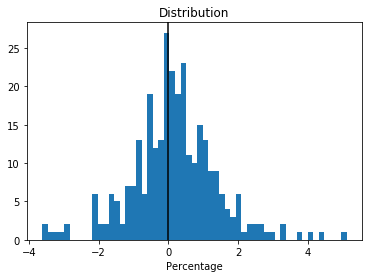

                                                           
-------------------- Growth of investment -----------------------


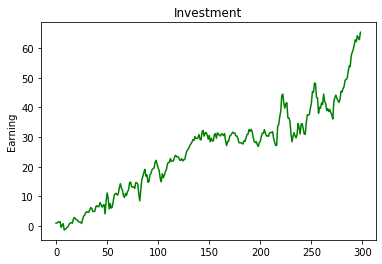

In [11]:
##### Importing the LinearSVR function and put it in a varibale
from sklearn.svm import LinearSVR
svr = LinearSVR()

##### Fit the LinearSVR
svr.fit(Xtrain_sc, ytrain_sc)

##### Predictions and earning
y_pred = sc.inverse_transform(svr.predict(Xvisu_sc))
y_pred = y_pred.reshape(len(y_pred),1)

earning(y_pred, y_visu, leverage=1)

##### Décision Tree Regressor

------------------ Initialisation -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 51.84 %
Pourcentage of earnings: 25.26 %
Poucentage composed: 25.74 %
Ratio earning/trade: 0.08 %
Standard deviation of earning: 1.25 %
Sharpe ratio: 0.067366
Sortino ratio: 0.099921
                                                           
-------------------- Other Data -----------------------
Sum rise earning: 18.07 %
Sum drop earning: 7.19 %
Max rise earning: 4.43 %
Min rise earning: -4.17 %
Max drop earning: 5.1 %
Min drop earning: -3.45 %
                                                           
-------------------- Distribution -----------------------


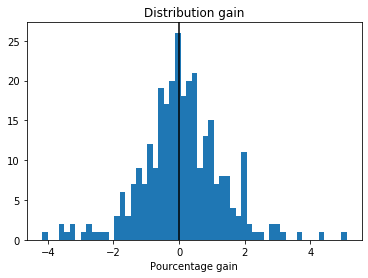

                                                           
-------------------- Growth -----------------------


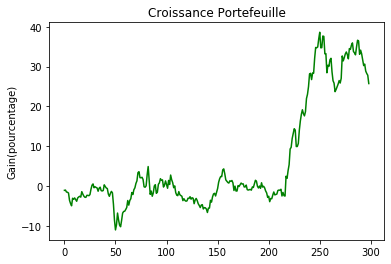

In [13]:
##### Importing the DecisionTreeRegressor function and put it in a varibale
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=None)

##### Fit the LinearSVR
tree.fit(Xtrain_sc, ytrain_sc)

##### Predictions and earning
y_pred = sc.inverse_transform(tree.predict(Xvisu_sc))
y_pred = y_pred.reshape(len(y_pred),1)

earning(y_pred, y_visu, leverage=1)


##### Random Forest Regressor

------------------ Initialisation -----------------------
Rising threshold: 0.0
Lower threshold: 0.0
Spread: 0.0005
Leverage: 1
                                                           
---------------------- Metrics ----------------------------
Accuracy 51.84 %
Pourcentage of earnings: 34.94 %
Poucentage composed: 38.54 %
Ratio earning/trade: 0.12 %
Standard deviation of earning: 1.25 %
Sharpe ratio: 0.093476
Sortino ratio: 0.150788
                                                           
-------------------- Other Data -----------------------
Sum rise earning: 21.66 %
Sum drop earning: 13.28 %
Max rise earning: 4.43 %
Min rise earning: -4.17 %
Max drop earning: 5.1 %
Min drop earning: -2.7 %
                                                           
-------------------- Distribution -----------------------


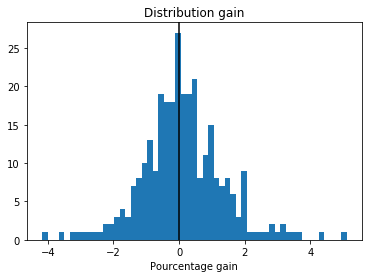

                                                           
-------------------- Growth -----------------------


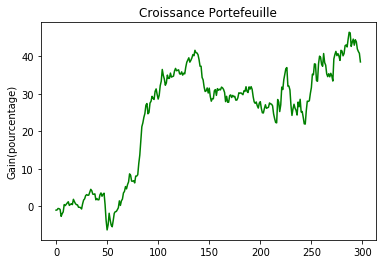

In [14]:
##### Importing the RandomForestRegressor function and put it in a varibale
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50)

##### Fit the RandomForestRegressor
rfr.fit(Xtrain_sc, ytrain_sc)

##### Predictions and earning
y_pred = sc.inverse_transform(rfr.predict(Xvisu_sc))
y_pred = y_pred.reshape(len(y_pred),1)

earning(y_pred, y_visu, leverage=1)